# Plotting multiple sequences

This snippet shows you how to plot a number of sequences as one combined event plot.

## Simple example
Let's first start by importing what we are going to need:

In [ ]:
from combio.core import Sequence, Stimulus, StimSequence
from combio.visualization import plot_multiple_sequences
import numpy as np

# Additionally suppress warnings to avoid confusion
import warnings
warnings.filterwarnings('ignore')

Let's create two dummy sequences:

In [29]:
# This is for reproducible randomness (so you will get the same sequences as me)
rng = np.random.default_rng(seed=123)

# Create sequences
seq_isoc = Sequence.generate_isochronous(n=8, ioi=500)
seq_random = Sequence.generate_random_normal(n=8, mu=500, sigma=100, rng=rng)

Now we make a list of these sequences, and plot using `plot_multiple_sequences`.

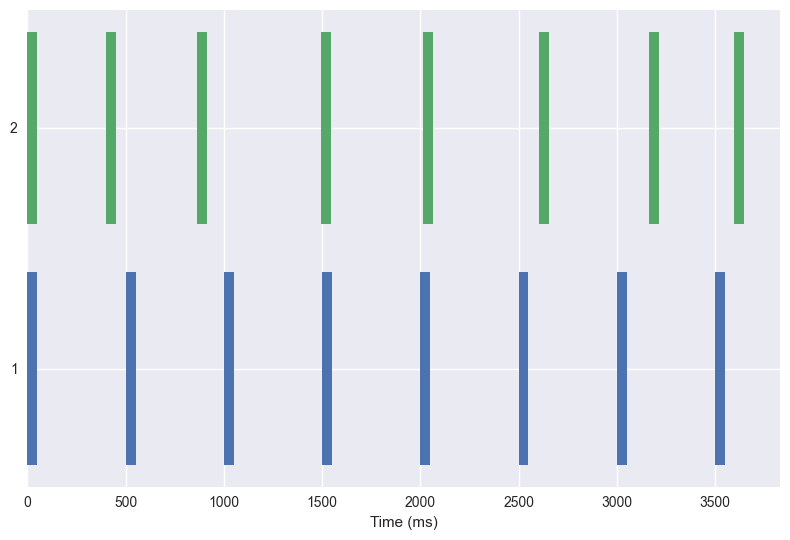

In [30]:
seqs = [seq_isoc, seq_random]
plot_multiple_sequences(seqs);

## Simple example with simple sequence onsets

In addition to passing Sequence or StimSequence objects, we can also plot sequences using a simple
list containing event onsets. Then, we can also plot with a different onset than zero.

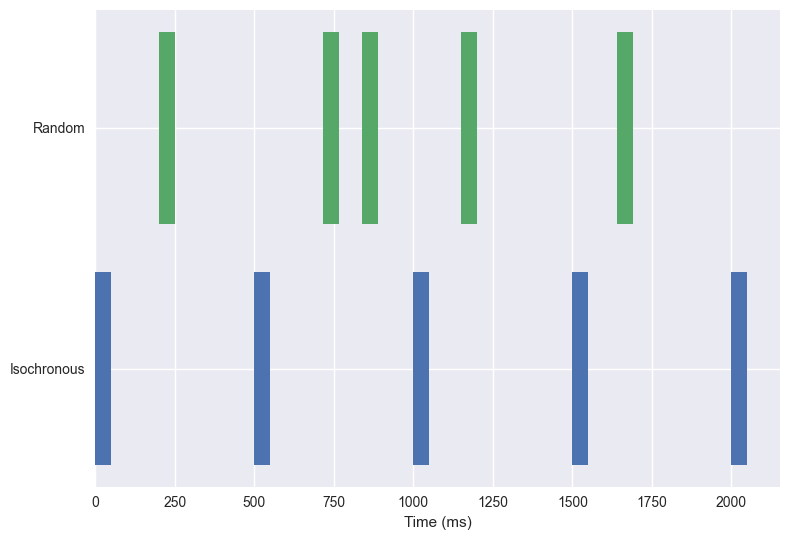

In [31]:
seq_isoc_onsets = Sequence.generate_isochronous(n=5, ioi=500).onsets  # Note how we get the onsets
seq_other_onsets = np.cumsum([200, 515, 123, 312, 489])

plot_multiple_sequences([seq_isoc_onsets, seq_other_onsets], sequence_names=["Isochronous", "Random"]);

## Complex example
In this example we randomly generate 10 sequences with random inter-onset intervals (IOIs), each containing 5 events
that also have random event durations.

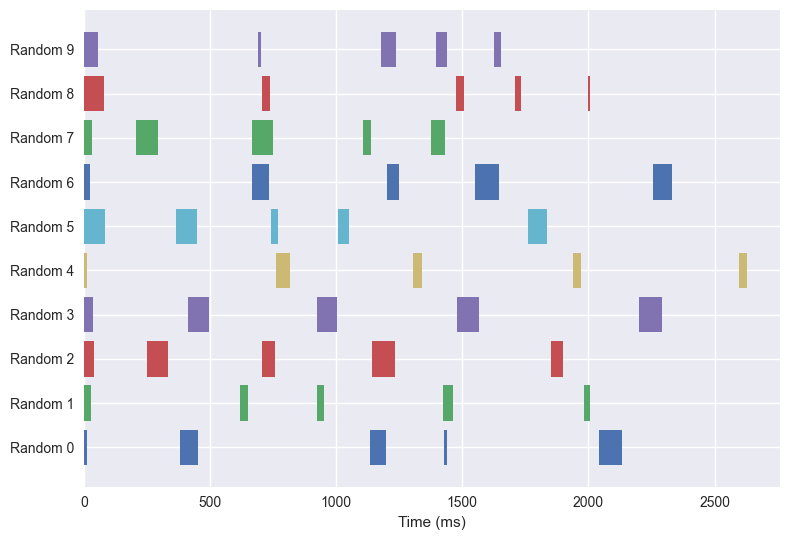

In [32]:
# For reproducible randomness
rng = np.random.default_rng(seed=123)

# Generate random sequences using
seqs = [Sequence.generate_random_uniform(n=5, a=200, b=800) for _ in range(10)]

# Create empty list that we will fill with StimSequence objects
stimseqs = []

# Loop over the sequences
for seq in seqs:
    # Generate 10 events with random durations
    stims = [Stimulus.generate(duration=rng.integers(low=10, high=100, size=1)) for _ in range(5)]
    # Create a StimSequence and add to stimseqs list
    stimseqs.append(StimSequence(stims, seq))

# Additionally give them names
sequence_names = [f"Random {i}" for i in range(len(stimseqs))]

# Now plot!!
plot_multiple_sequences(stimseqs, sequence_names=sequence_names);